In [109]:
# Assignment 1 - Programming for Data Analytics
#Task 1 & Task 2
# Helmi K Abraham
# Srujana Kurudi Adisesha Gupta

In [110]:
import csv
import time
import math
import numpy as np
import pandas as pd
from collections import Counter
from math import sqrt

In [111]:
# Loading data
data = csv.reader(open('Downloads/online_shoppers_intention.csv/online_shoppers_intention.csv','r'),delimiter = ',')

In [112]:
data

In [113]:
# Collecting columns
column = list(zip(*data))

In [114]:
len(column)

18

In [115]:
# Displaying First 10 elements of column 1
column[0][0:11]

('Administrative', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0')

In [116]:
# Function to find missing values in the dataset
def missing_values(file_path):
    missing_values = {}
    
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        headers = next(csv_reader)  # Read the header row
        
        # Initialize a dictionary to track missing values for each column
        for header in headers:
            missing_values[header] = 0
        
        # Check for missing values in each row
        for row in csv_reader:
            for i, value in enumerate(row):
                if value.strip() == "" or value.strip().lower() in ["na", "null"]:  # Check for empty or placeholders
                    missing_values[headers[i]] += 1
                    
    return missing_values



file_path = 'Downloads/online_shoppers_intention.csv/online_shoppers_intention.csv'

# Find missing values
missing_values = missing_values(file_path)

# Display results
print("Missing Values Per Column:")
for column, count in missing_values.items():
    print(f"{column}: {count} missing values")

Missing Values Per Column:
Administrative: 0 missing values
Administrative_Duration: 0 missing values
Informational: 0 missing values
Informational_Duration: 0 missing values
ProductRelated: 0 missing values
ProductRelated_Duration: 0 missing values
BounceRates: 0 missing values
ExitRates: 0 missing values
PageValues: 0 missing values
SpecialDay: 0 missing values
Month: 0 missing values
OperatingSystems: 0 missing values
Browser: 0 missing values
Region: 0 missing values
TrafficType: 0 missing values
VisitorType: 0 missing values
Weekend: 0 missing values
Revenue: 0 missing values


In [117]:
# Calculating Summary Statistics
# Mean
def calculate_mean(data):
    return sum(data) / len(data) if data else 0

# Median
def calculate_median(data):
    data.sort()
    n = len(data)
    if n % 2 == 0:
        return (data[n // 2 - 1] + data[n // 2]) / 2
    else:
        return data[n // 2]

# Mode
def calculate_mode(data):
    counter = Counter(data)
    return counter.most_common(1)[0][0]

# Standard deviation and Variance
def calculate_variance_std(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = sqrt(variance)
    return variance, std_dev

# Minimum and Maximum
def calculate_min_max(data):
    return min(data), max(data)
    
# Range
def calculate_range(data):
    return max(data) - min(data)
    
# Interquartile range (IQR)
def calculate_iqr(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    Q1 = sorted_data[n // 4]
    Q3 = sorted_data[3 * n // 4]
    return Q3 - Q1


# Processing categorical columns
def process_categorical(data):
    counter = Counter(data)
    total = sum(counter.values())
    relative_freq = {k: v / total for k, v in counter.items()}
    return relative_freq

# Main function to calculate summary statistics
def summary_statistics(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = {col: [] for col in reader.fieldnames}
        
        # Read the dataset into a dictionary of lists
        for row in reader:
            for col, value in row.items():
                if value.isdigit() or is_float(value):   # Check for numerical data
                    data[col].append(float(value))
                else:                                    # Treat as categorical/boolean
                    data[col].append(value)
        
        # Calculate statistics for each column
        for col, values in data.items():
            print(f"\nSummary Statistics for Column: {col}")
            
            if isinstance(values[0], (int, float)):      # Numerical columns
                mean = calculate_mean(values)
                median = calculate_median(values)
                mode = calculate_mode(values)
                variance, std_dev = calculate_variance_std(values)
                min_val, max_val = calculate_min_max(values)
                range = calculate_range(values)
                iqr = calculate_iqr(values)
                print(f"  Mean: {mean}")
                print(f"  Median: {median}")
                print(f"  Mode: {mode}")
                print(f"  Variance: {variance}")
                print(f"  Standard Deviation: {std_dev}")
                print(f"  Min: {min_val}")
                print(f"  Max: {max_val}")
                print(f"  Range: {range}")
                print(f"Interquartile Range (IQR): {iqr}")
            
            else:                                         # Categorical/boolean columns
                freq_dist = process_categorical(values)
                print(f"  Frequency Distribution: {freq_dist}")

#Function to check if a value is a float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


# Function call for given Dataset
summary_statistics('Downloads/online_shoppers_intention.csv/online_shoppers_intention.csv')



Summary Statistics for Column: Administrative
  Mean: 2.3151662611516626
  Median: 1.0
  Mode: 0.0
  Variance: 11.033354737158527
  Standard Deviation: 3.321649400096062
  Min: 0.0
  Max: 27.0
  Range: 27.0
Interquartile Range (IQR): 4.0

Summary Statistics for Column: Administrative_Duration
  Mean: 80.81861053933592
  Median: 7.5
  Mode: 0.0
  Variance: 31248.318300118688
  Standard Deviation: 176.77193866708225
  Min: 0.0
  Max: 3398.75
  Range: 3398.75
Interquartile Range (IQR): 93.3

Summary Statistics for Column: Informational
  Mean: 0.5035685320356853
  Median: 0.0
  Mode: 0.0
  Variance: 1.6131665032109026
  Standard Deviation: 1.2701049181901873
  Min: 0.0
  Max: 24.0
  Range: 24.0
Interquartile Range (IQR): 0.0

Summary Statistics for Column: Informational_Duration
  Mean: 34.47239792772303
  Median: 0.0
  Mode: 0.0
  Variance: 19808.75720038871
  Standard Deviation: 140.74358671139765
  Min: 0.0
  Max: 2549.375
  Range: 2549.375
Interquartile Range (IQR): 0.0

Summary Stat

In [118]:

# Function to calculate execution time
def measure_execution_time(filename, pure_python_func):
    start_time = time.time()
    pure_python_func(filename)
    duration = time.time() - start_time
    return duration

# Timing to find summary statistics using pure Python
def summary_statistics(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = {col: [] for col in reader.fieldnames}
        
        # Read the dataset into a dictionary of lists
        for row in reader:
            for col, value in row.items():
                if value.isdigit() or is_float(value):  # Check for numerical data
                    data[col].append(float(value))
                else:                                   # Treat as categorical/boolean
                    data[col].append(value)
        
        # Perform the computations
        for col, values in data.items():
            if isinstance(values[0], (int, float)):     # Numerical columns
                calculate_mean(values)
                calculate_median(values)
                calculate_mode(values)
                calculate_variance_std(values)
                calculate_min_max(values)
                calculate_range(values)
                calculate_iqr(values)
            else:                                       # Categorical columns
                process_categorical(values)

# function to check if a value is a float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Dataset
filename = 'Downloads/online_shoppers_intention.csv/online_shoppers_intention.csv'

# Measure execution time and display
pure_python_time = measure_execution_time(filename, summary_statistics)
print(f"Execution Time Using Pure Python: {pure_python_time:.4f} seconds")


Execution Time Using Pure Python: 0.1840 seconds


In [119]:
#Task 2
#Using pandas
# Start the timer
start = time.time()

# Load the dataset using pandas
file_path = 'Downloads/online_shoppers_intention.csv/online_shoppers_intention.csv'
data = pd.read_csv(file_path)

# Summary statistics for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

print("Summary Statistics for Numerical Columns:\n")
for col in numerical_columns:
    mean_val = data[col].mean()
    median_val = data[col].median()
    mode_val = data[col].mode().iloc[0]
    variance_val = data[col].var()
    std_dev_val = data[col].std()
    range_val = data[col].max() - data[col].min()
    iqr_val = data[col].quantile(0.75) - data[col].quantile(0.25)

    print(f"Column: {col}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print(f"  Variance: {variance_val:.2f}")
    print(f"  Standard Deviation: {std_dev_val:.2f}")
    print(f"  Range: {range_val:.2f}")
    print(f"  Interquartile Range (IQR): {iqr_val:.2f}\n")

# Relative Frequency for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Relative Frequency for Categorical Columns:\n")
for col in categorical_columns:
    print(f"Column: {col}")
    print(data[col].value_counts())
    print()

# End the timer and display the duration
pandas_time = time.time() - start
print(f"\nTime to run the pandas code in seconds: {pandas_time:.2f}")


Summary Statistics for Numerical Columns:

Column: Administrative
  Mean: 2.32
  Median: 1.00
  Mode: 0
  Variance: 11.03
  Standard Deviation: 3.32
  Range: 27.00
  Interquartile Range (IQR): 4.00

Column: Administrative_Duration
  Mean: 80.82
  Median: 7.50
  Mode: 0.0
  Variance: 31250.85
  Standard Deviation: 176.78
  Range: 3398.75
  Interquartile Range (IQR): 93.26

Column: Informational
  Mean: 0.50
  Median: 0.00
  Mode: 0
  Variance: 1.61
  Standard Deviation: 1.27
  Range: 24.00
  Interquartile Range (IQR): 0.00

Column: Informational_Duration
  Mean: 34.47
  Median: 0.00
  Mode: 0.0
  Variance: 19810.36
  Standard Deviation: 140.75
  Range: 2549.38
  Interquartile Range (IQR): 0.00

Column: ProductRelated
  Mean: 31.73
  Median: 18.00
  Mode: 1
  Variance: 1978.07
  Standard Deviation: 44.48
  Range: 705.00
  Interquartile Range (IQR): 31.00

Column: ProductRelated_Duration
  Mean: 1194.75
  Median: 598.94
  Mode: 0.0
  Variance: 3662130.14
  Standard Deviation: 1913.67
  Ra

In [120]:

# Function to increase dataset size
def enlarge_dataset(input_file, output_file, factor):
    df = pd.read_csv(input_file)
    enlarged_df = pd.concat([df] * factor, ignore_index=True)
    enlarged_df.to_csv(output_file, index=False)
    print(f"Enlarged dataset created: {output_file}")



# Function to measure execution time for pure Python
def measure_execution_time(file_path, summary_function):
    start = time.time()
    summary_function(file_path)
    return time.time() - start

# Enlarge the dataset
input_file = 'Downloads/online_shoppers_intention.csv/online_shoppers_intention.csv'
output_file = 'large_dataset.csv'
enlarge_dataset(input_file, output_file, factor=2)

# Measure execution time for pure Python solution
large_pure_python_time = measure_execution_time(output_file, summary_statistics)

# Measure execution time for pandas operations
start = time.time()  # Start timing here
df = pd.read_csv(output_file)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    variance_val = df[col].var()
    std_dev_val = df[col].std()
    range_val = df[col].max() - df[col].min()
    iqr_val = df[col].quantile(0.75) - df[col].quantile(0.25)

large_pandas_time = time.time() - start  # Stop timing here

# Print results
print(f"Execution Time (Pure Python on large dataset): {large_pure_python_time:.4f} seconds")
print(f"Execution Time (Pandas on large dataset): {large_pandas_time:.4f} seconds")


Enlarged dataset created: large_dataset.csv
Execution Time (Pure Python on large dataset): 0.4824 seconds
Execution Time (Pandas on large dataset): 0.0786 seconds


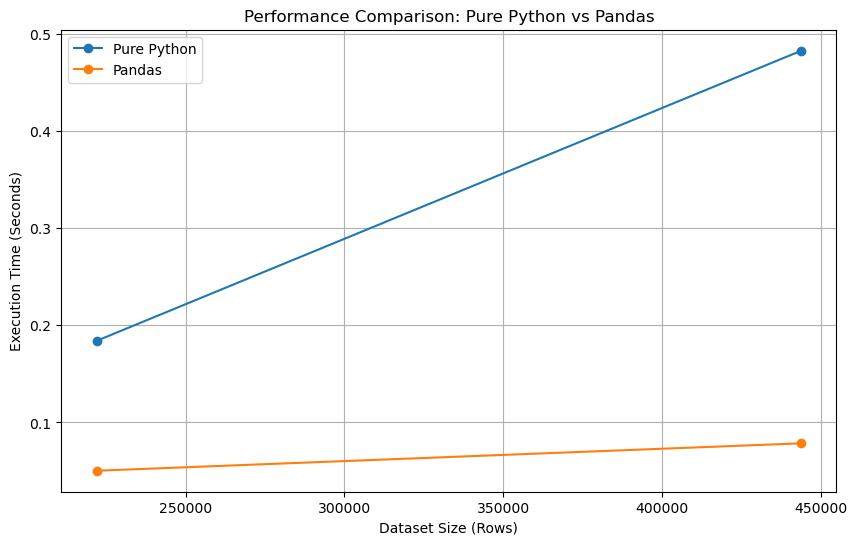

In [121]:
#Exploring the dataset size and execution time
import matplotlib.pyplot as plt

# Dataset sizes and timings
dataset_sizes = [221958, 443898]
pure_python_times = [pure_python_time,large_pure_python_time]
pandas_times = [pandas_time,large_pandas_time]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, pure_python_times, label='Pure Python', marker='o')
plt.plot(dataset_sizes, pandas_times, label='Pandas', marker='o')
plt.xlabel('Dataset Size (Rows)')
plt.ylabel('Execution Time (Seconds)')
plt.title('Performance Comparison: Pure Python vs Pandas')
plt.legend()
plt.grid(True)
plt.show()
